# Merge Sort

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2017 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate

### Empirical order of growth

Sometimes we can figure out what order of growth a function belongs to by running it with a range of problem sizes and measuring the run time.

`order.py` contains functions from Appendix A we can use to estimate order of growth.

In [2]:
from order import run_timing_test, plot_timing_test

### Comparing sort algorithms

NumPy provides implementations of three sorting algorithms, quicksort, mergesort, and heapsort.

Read about each of these algorithms to see what order of growth they belong to.

Now let's see if we can characterize their asymptotic behavior.



1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.020000000000000018
131072 0.020000000000000018
262144 0.03000000000000025
524288 0.06000000000000005
1048576 0.11999999999999966
2097152 0.29000000000000004
4194304 0.5800000000000001
8388608 1.17


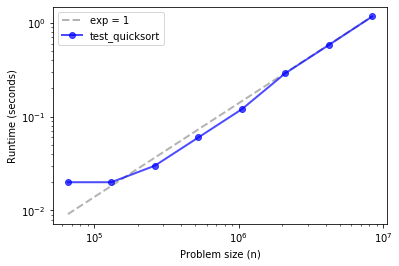

In [3]:
def test_quicksort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='quicksort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_quicksort', exp=1)

Quicksort is hard to distinguish from linear, up to about 10 million elements.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.009999999999999787
131072 0.020000000000000462
262144 0.03000000000000025
524288 0.07999999999999918
1048576 0.15000000000000036
2097152 0.34000000000000075
4194304 0.6799999999999997
8388608 1.42


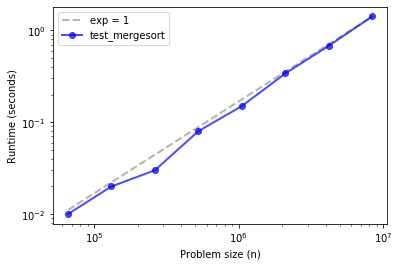

In [4]:
def test_mergesort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='mergesort')

ns, ts = run_timing_test(test_mergesort)
plot_timing_test(ns, ts, 'test_mergesort', exp=1)

Merge sort is similar, maybe with some upward curvature.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000000675
32768 0.0
65536 0.019999999999999574
131072 0.019999999999999574
262144 0.03000000000000025
524288 0.05999999999999961
1048576 0.13000000000000078
2097152 0.2599999999999998
4194304 0.5600000000000005
8388608 1.1699999999999982


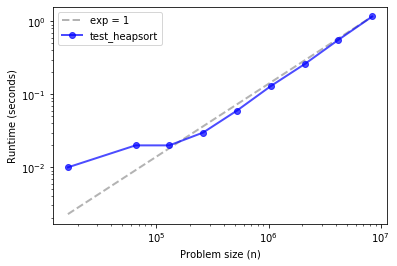

In [5]:
def test_heapsort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='heapsort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_heapsort', exp=1)

The three methods are effectively linear over this range of problem sizes.

And their run times are about the same, with quicksort being the fastest, despite being the one with the worst asympotic performance in the worst case.

### Implementing Merge Sort



In [6]:
def merge_sort_norec(xs):
    N = len(xs)
    left = xs[:N//2]
    right = xs[N//2:]
    
    left.sort()
    right.sort()
    
    return merge(left, right)

This version breaks the array in half, uses `np.sort` to sort the two halves, then uses merge to put the halves together.

**Exercise:** Write a function called `merge` that takes two sorted NumPy arrays, `left` and `right`, and returns a new array that contains all elements from `left` and `right`, sorted.  (where "sorted" means in ascending order, or non-decreasing, to be more precise).

Note: this function is not hard to write, but it is notoriously difficult to get all of the edge cases right without making the function unreadable.  Take it as a challenge to write a version that is correct, concise, and readable.

In [7]:
np.empty(3)

array([  0.  ,  28.  , 104.25])

In [8]:
# Solution

def merge(left, right):
    def dump(array, index):
        res[k:] = array[index:]
        return res

    n, m = len(left), len(right)
    res = np.empty(n + m)
    i = 0
    j = 0
    
    for k in range(len(res)):
        if i == n:
            return dump(right, j)
        if j == m:
            return dump(left, i)
        
        if left[i] < right[j]:
            res[k], i = left[i], i+1
        else:
            res[k], j = right[j], j+1
            
    return res

In [9]:
xs = np.random.random(10)
ys = np.random.random(10)
xs.sort()
ys.sort()
res = merge(xs, ys)
all(sorted(res) == res)

True

**Exercise:**  Starting with `merge_sort_norec`, write a function called `merge_sort_rec` that's fully recursive; that is, instead of using `numpy.sort` to compute the DFTs of the halves, it should use `merge_sort_rec`.  Of course, you will need a base case to avoid an infinite recursion.



In [13]:
# Solution

def merge_sort_rec(xs):
    N = len(xs)
    if N < 2:
        return xs
    
    left = merge_sort_rec(xs[:N//2])
    right = merge_sort_rec(xs[N//2:])
    
    return merge(left, right)

Test your method by running the code in the next cell, then use `test_merge_sort_rec`, below, to check the performance of your function.

In [14]:
xs = np.random.random(10)

res = merge_sort_rec(xs)
all(sorted(res) == res)

True

1024 0.019999999999999574
2048 0.019999999999999574
4096 0.040000000000000924
8192 0.05999999999999872
16384 0.16999999999999993
32768 0.3500000000000014
65536 0.7400000000000002
131072 1.4900000000000002


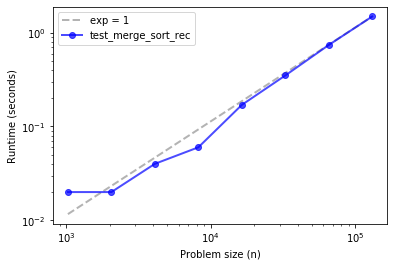

In [15]:
def test_merge_sort_rec(n):
    xs = np.random.normal(size=n)
    spectrum = merge_sort_rec(xs)

ns, ts = run_timing_test(test_merge_sort_rec)
plot_timing_test(ns, ts, 'test_merge_sort_rec', exp=1)

If things go according to plan, your implementation of merge sort should be close to linear, or a little steeper.